In [109]:
#importing all Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
data = pd.read_csv(r"E:\FlipRobo\NLP Projects to do\Fake news project\train_news.csv")
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [111]:
data.shape

(20800, 6)

In [115]:
data.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [52]:
data.describe()

,Unnamed: 0,id,label
count,20800.000000,20800.000000,20800.000000
mean,10399.500000,10399.500000,0.500625
std,6004.587135,6004.587135,0.500012
min,0.000000,0.000000,0.000000
25%,5199.750000,5199.750000,0.000000
50%,10399.500000,10399.500000,1.000000
75%,15599.250000,15599.250000,1.000000
max,20799.000000,20799.000000,1.000000


##### Removing irrelavant columns

In [53]:
data.drop(['Unnamed: 0','id'], axis=1, inplace=True)
data.head(5)

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [54]:
data.shape

(20800, 4)

##### EDA

In [63]:
data.isnull().sum()

headline       499
written_by    1907
news            39
label            0
dtype: int64

In [64]:
data=data.fillna("")

In [65]:
data['NEWS']=data['headline'].str.cat(data['news'], sep =" ")

In [66]:
data['NEWS']=data['written_by'].str.cat(data['NEWS'], sep =" ")

In [67]:
data.head()

,headline,written_by,news,label,NEWS
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Eric Lipton and Steve Eder Ethics Questions Do...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,David Waldstein U.S. Must Dig Deep to Stop Arg...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Pam Key Cotton to House: ’Do Not Walk the Plan...
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Jess Bidgood Paul LePage, Besieged Maine Gover..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,Finian Cunningham A Digital 9/11 If Trump Wins...


In [68]:
data.shape

(20603, 5)

In [69]:
data.drop(columns=['headline','written_by','news'],axis=1,inplace=True)

In [70]:
data.head()

,label,NEWS
0,0,Eric Lipton and Steve Eder Ethics Questions Do...
1,0,David Waldstein U.S. Must Dig Deep to Stop Arg...
2,0,Pam Key Cotton to House: ’Do Not Walk the Plan...
3,0,"Jess Bidgood Paul LePage, Besieged Maine Gover..."
4,1,Finian Cunningham A Digital 9/11 If Trump Wins...


In [71]:
print ('label counts','\n',data.label.value_counts())

label counts 
 0    10387
1    10216
Name: label, dtype: int64


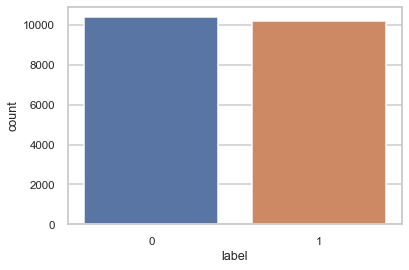

In [72]:
sns.countplot(x='label',data=data)

In [73]:
#New column for Length of NEWS
data['length'] = data.NEWS.str.len()
data.head(2)

,label,NEWS,length
0,0,Eric Lipton and Steve Eder Ethics Questions Do...,8048
1,0,David Waldstein U.S. Must Dig Deep to Stop Arg...,6201


##### Data Preprocessing

In [74]:
# Convert all mail to lower case
data['NEWS'] = data['NEWS'].str.lower()

In [75]:
# Replace email addresses with 'email'
data['NEWS'] = data['NEWS'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['NEWS'] = data['NEWS'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['NEWS'] = data['NEWS'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['NEWS'] = data['NEWS'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['NEWS'] = data['NEWS'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
data['NEWS'] = data['NEWS'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
data['NEWS'] = data['NEWS'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
data['NEWS'] = data['NEWS'].str.replace(r'^\s+|\s+?$', '')


In [76]:
data.head()

,label,NEWS,length
0,0,eric lipton and steve eder ethics questions do...,8048
1,0,david waldstein u s must dig deep to stop arge...,6201
2,0,pam key cotton to house do not walk the plank ...,534
3,0,jess bidgood paul lepage besieged maine govern...,6630
4,1,finian cunningham a digital numbr numbr if tru...,9211


In [77]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

data['NEWS'] = data['NEWS'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [78]:
# New column (clean_length) after puncuations,stopwords removal
data['clean_length'] = data.NEWS.str.len()
data.head()

,label,NEWS,length,clean_length
0,0,eric lipton steve eder ethics questions dogged...,8048,5624
1,0,david waldstein must dig deep stop argentina l...,6201,4236
2,0,pam key cotton house walk plank vote bill cann...,534,340
3,0,jess bidgood paul lepage besieged maine govern...,6630,4513
4,1,finian cunningham digital numbr numbr trump wi...,9211,6775


In [79]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 95479613
Clean Length 66586464


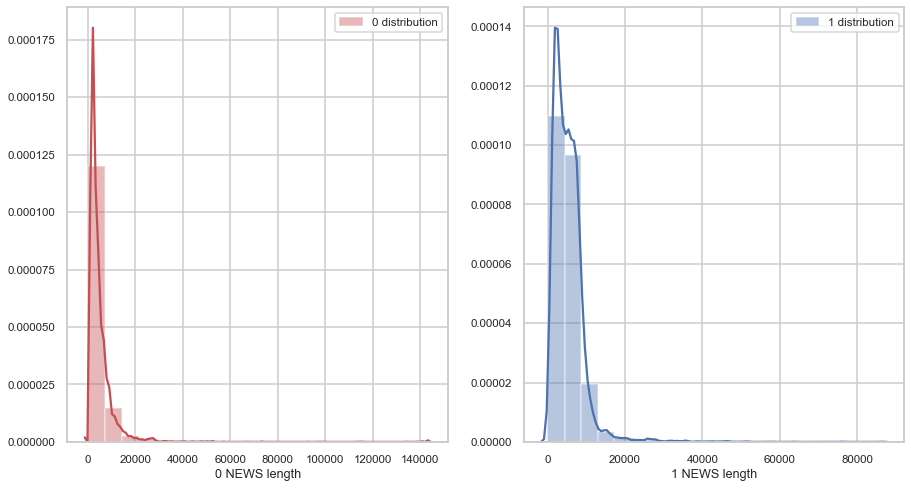

In [80]:
# News distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']==1]['length'],bins=20,ax=ax[0],label='0 distribution',color='r')

ax[0].set_xlabel('0 NEWS length')
ax[0].legend()

sns.distplot(data[data['label']==0]['length'],bins=20,ax=ax[1],label='1 distribution')
ax[1].set_xlabel('1 NEWS length')
ax[1].legend()

plt.show()

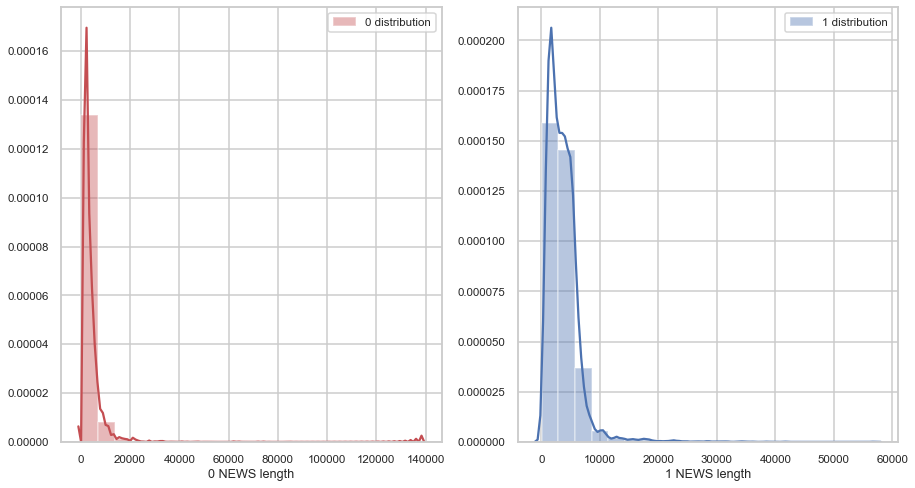

In [81]:
# News distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']==1]['clean_length'],bins=20,ax=ax[0],label='0 distribution',color='r')
ax[0].set_xlabel('0 NEWS length')
ax[0].legend()

sns.distplot(data[data['label']==0]['clean_length'],bins=20,ax=ax[1],label='1 distribution')
ax[1].set_xlabel('1 NEWS length')
ax[1].legend()

plt.show()

##### Getting sense of loud words in 0

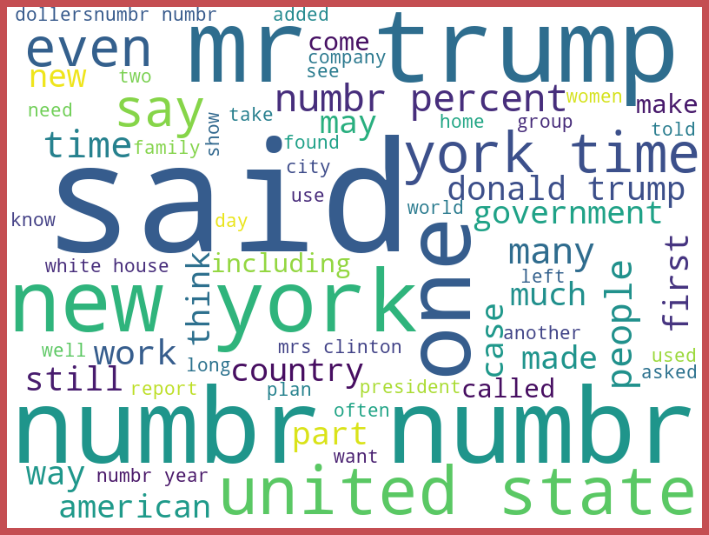

In [82]:
from wordcloud import WordCloud

no_fake=data['NEWS'][data['label']==0]
no_fake_cloud=WordCloud(width=800,height=600,background_color='white',max_words=65).generate(' '.join(no_fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(no_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

##### Getting sense of loud words in 1

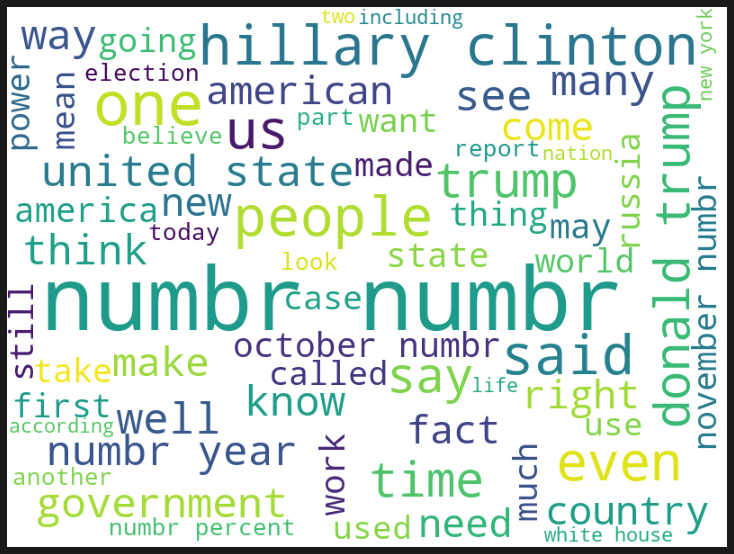

In [83]:
fake = data['NEWS'][data['label']==1]
fake_cloud = WordCloud(width=800,height=600,background_color='white',max_words=65).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Modelling

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import accuracy_score,classification_report,f1_score,auc,roc_curve,\
confusion_matrix,log_loss,precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
x=tfidf(input='content', encoding='utf-8', lowercase=True,stop_words='english').fit_transform(data['NEWS'])
x

<20603x177675 sparse matrix of type '<class 'numpy.float64'>'
	with 5208788 stored elements in Compressed Sparse Row format>

In [86]:
y=data['label']

In [87]:
ACCURACY = []
PRECISION = []
RECALL = []
RMSE = []
MSE = []
ROC_AUC=[]

def acusr(model,x,y):
    max_ac=0
    for rst in range(25,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        pre=precision_score(y_test,pred)
        rec=recall_score(y_test,pred)
        mse=mean_squared_error(y_test,pred)
        rmse=np.sqrt(mse)
        fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
        if acc>max_ac:
            max_ac=acc
            final_rst=rst
         
    print("In this",model,"\nRANDOM STATE:\n",final_rst)
    print('\nACCURACY SCORE:\n', max_ac)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nf1_SCORE:\n', f1)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nROC_AUC:\n',roc_auc)

    #ADDING VALUES TO LIST
    ACCURACY.append(acc)
    PRECISION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    ROC_AUC.append(roc_auc)
    
   
    #PLOTTING auc_roc CURVE
    sns.set(style='whitegrid',context='talk',font_scale=0.7)
    plt.figure(figsize=(8,7),dpi=120)
    plt.plot([0,1],[0,1],color='aquamarine',linestyle=":",lw=3)
    plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc,color='dodgerblue',lw=3,linestyle='--')
    plt.legend(loc='lower right',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
    plt.show()
    
    
    #PLOTTING CONFUSION MATRIX
    plt.figure(figsize=(6,4),dpi=120)
    sns.heatmap(conf,annot=True,cmap='Blues')
    plt.title('HEATMAP OF CONFUSION MATRIX')
    plt.show()

##### LOGISTIC REGRESSION

In this LogisticRegression(max_iter=600, warm_start=True) 
RANDOM STATE:
 71

ACCURACY SCORE:
 0.9634363371622715

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3151
           1       0.95      0.97      0.96      3030

    accuracy                           0.96      6181
   macro avg       0.96      0.96      0.96      6181
weighted avg       0.96      0.96      0.96      6181


CONFUSION MATRIX:
 [[3005  146]
 [  91 2939]]

f1_SCORE:
 0.9612428454619788

PRECISION:
 0.952674230145867

RECALL:
 0.96996699669967

MEAN SQUARED ERROR:
 0.038343310143989645

ROOT MEAN SQ. ERROR:
 0.19581447889262338

ROC_AUC:
 0.961816249857293


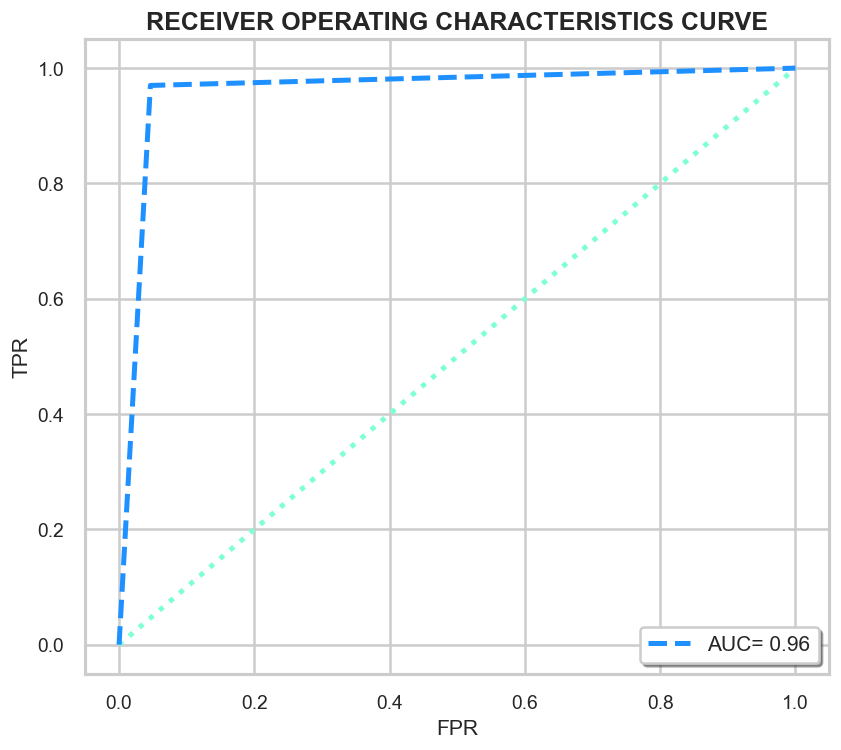

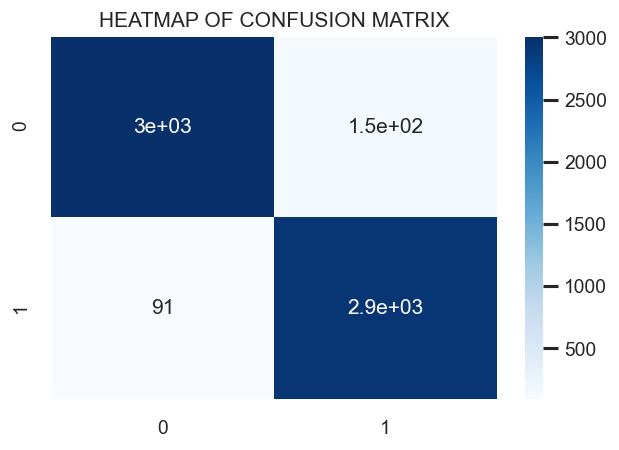

In [88]:
lr=LogisticRegression(max_iter=600,warm_start=True)
acusr(lr,x,y)

##### MULTINOMIAL NB

In [89]:
nb=MultinomialNB()
params = {'alpha': [0.1, 0.2, 0.8, 0.9, 1.0]}
mnb = gsv(nb,params,scoring='f1_weighted', cv=50)
mnb.fit(x,y)
print(mnb)
print('\nbest_score=',mnb.best_score_)
print('\nbest_parameters=',mnb.best_params_)

GridSearchCV(cv=50, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.8, 0.9, 1.0]},
             scoring='f1_weighted')

best_score= 0.9214511830998449

best_parameters= {'alpha': 0.1}


In this MultinomialNB(alpha=0.1) 
RANDOM STATE:
 88

ACCURACY SCORE:
 0.9259019576120369

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3151
           1       0.98      0.86      0.91      3030

    accuracy                           0.92      6181
   macro avg       0.93      0.92      0.92      6181
weighted avg       0.93      0.92      0.92      6181


CONFUSION MATRIX:
 [[3087   64]
 [ 436 2594]]

f1_SCORE:
 0.9120956399437411

PRECISION:
 0.9759217456734387

RECALL:
 0.856105610561056

MEAN SQUARED ERROR:
 0.08089305937550559

ROOT MEAN SQ. ERROR:
 0.2844170518367448

ROC_AUC:
 0.9178972990920164


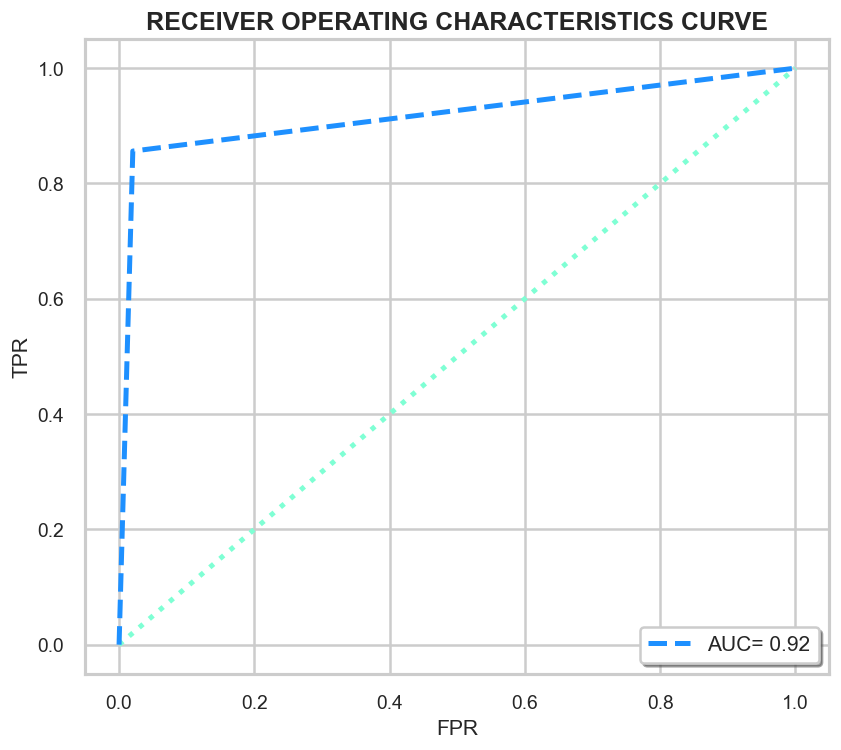

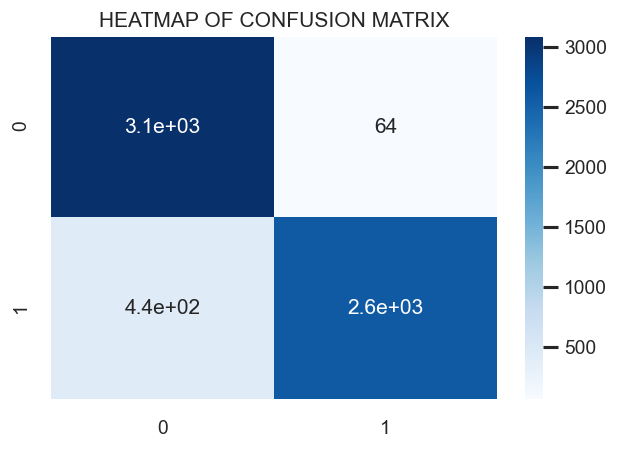

Wall time: 12.8 s


In [90]:
%%time
nb=MultinomialNB(alpha=0.1)
acusr(nb,x,y)

##### COMPLEMENT NB

In [91]:
NB_Params = {'alpha': [0.1,  0.9, 1.0]}

cnb = ComplementNB()
cnb_gsv = gsv(cnb, NB_Params, cv=20)
cnb_gsv.fit(x,y)
print(cnb_gsv)
print('\nbest_score=',cnb_gsv.best_score_)
print('\nbest_parameters=',cnb_gsv.best_params_)

GridSearchCV(cv=20, estimator=ComplementNB(),
             param_grid={'alpha': [0.1, 0.9, 1.0]})

best_score= 0.9224387200662942

best_parameters= {'alpha': 0.1}


In this ComplementNB(alpha=0.1) 
RANDOM STATE:
 88

ACCURACY SCORE:
 0.9262255298495389

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3151
           1       0.98      0.86      0.91      3030

    accuracy                           0.92      6181
   macro avg       0.93      0.92      0.92      6181
weighted avg       0.93      0.92      0.92      6181


CONFUSION MATRIX:
 [[3087   64]
 [ 435 2595]]

f1_SCORE:
 0.9122868693970821

PRECISION:
 0.9759308010530274

RECALL:
 0.8564356435643564

MEAN SQUARED ERROR:
 0.08073127325675457

ROOT MEAN SQ. ERROR:
 0.2841324924339956

ROC_AUC:
 0.9180623155936666


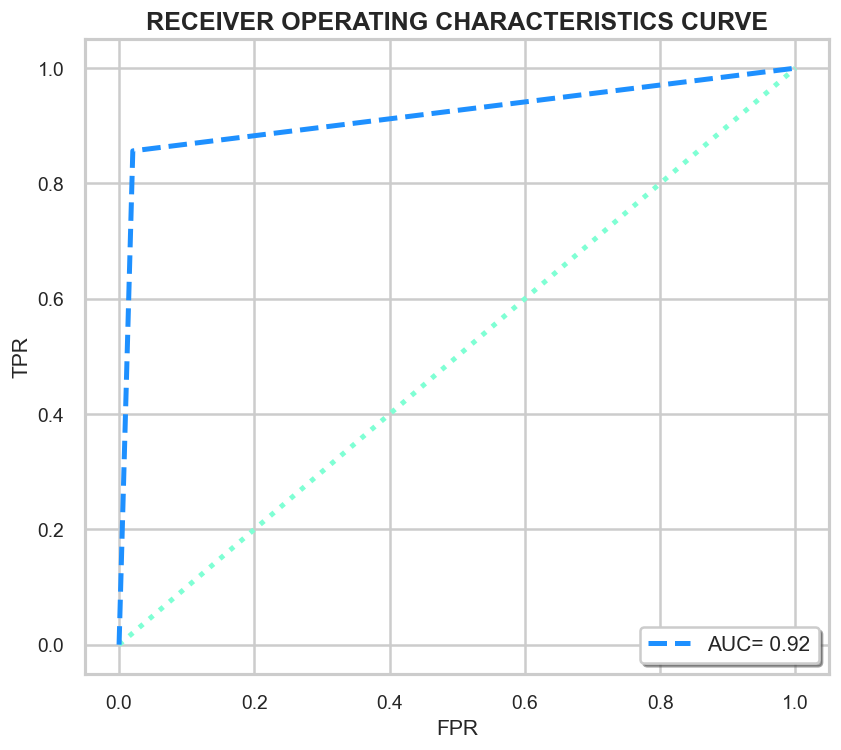

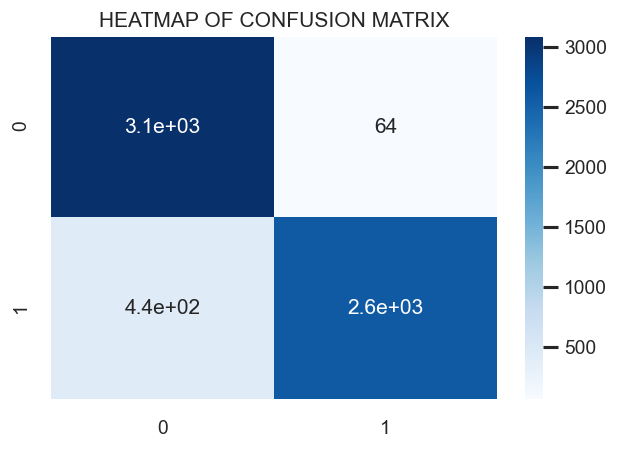

Wall time: 14 s


In [92]:
%%time
cnb = ComplementNB(alpha=0.1)
acusr(cnb,x,y)

In [107]:
model=["LOGISTIC",'MNB','CNB']
results = pd.DataFrame({"MODEL":model,'Accuracy':ACCURACY,'Precision': PRECISION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,"ROC_AUC":ROC_AUC})
                               
                                            
results.style.set_properties(**{'color': 'blue','border-color': 'darkorange'})

,MODEL,Accuracy,Precision,Recall,RMSE,MSE,ROC_AUC
0,LOGISTIC,0.961657,0.952674,0.969967,0.195814,0.038343,0.961816
1,MNB,0.919107,0.975922,0.856106,0.284417,0.080893,0.917897
2,CNB,0.919269,0.975931,0.856436,0.284132,0.080731,0.918062


In [108]:
import joblib
joblib.dump(lr,"fakenews.pkl")

['fakenews.pkl']